In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import seaborn as sns
import pycountry_convert as pycountry
import plotly.express as px
%matplotlib inline

In [2]:
all_orgs = pd.read_csv("COP2017_orgnames.csv")

In [3]:
all_orgs.head()

,name,entity_type
0,Afghanistan,Parties
1,Albania,Parties
2,Algeria,Parties
3,Andorra,Parties
4,Angola,Parties


In [4]:
all_orgs.entity_type.unique()

array(['Parties', 'Observer States',
       'United Nations Secretariat units and bodies',
       'Specialized agencies and related organizations',
       'Intergovernmental organizations',
       'Non-governmental organizations'], dtype=object)

In [5]:
NGO = all_orgs[all_orgs.entity_type == 'Non-governmental organizations'].copy()
IGO = all_orgs[all_orgs.entity_type == 'Intergovernmental organizations'].copy()
NGO.reset_index(drop = True, inplace = True)
IGO.reset_index(drop = True, inplace = True)

In [6]:
NGO.head()

,name,entity_type
0,A SEED Europe,Non-governmental organizations
1,Abibimman Foundation,Non-governmental organizations
2,Academy for Mountain Environics,Non-governmental organizations
3,ACT Alliance - Action by Churches Together,Non-governmental organizations
4,Action Against Hunger,Non-governmental organizations


In [7]:
IGO.head()

,name,entity_type
0,Adaptation Fund Board,Intergovernmental organizations
1,African Centre of Meteorological Application f...,Intergovernmental organizations
2,African Development Bank Group,Intergovernmental organizations
3,African Union Commission,Intergovernmental organizations
4,"African, Caribbean and Pacific Group of States",Intergovernmental organizations


In [8]:
initial_NGO = len(NGO.name) * [np.nan]
initial_IGO = len(IGO.name) * [np.nan]
NGO["constituency"], NGO["coordinator"], NGO["city"], NGO["country"] = initial_NGO, initial_NGO, initial_NGO, initial_NGO
IGO["constituency"], IGO["coordinator"], IGO["city"], IGO["country"] = initial_IGO, initial_IGO, initial_IGO, initial_IGO

In [9]:
NGO.head()

,name,entity_type,constituency,coordinator,city,country
0,A SEED Europe,Non-governmental organizations,NaN,NaN,NaN,NaN
1,Abibimman Foundation,Non-governmental organizations,NaN,NaN,NaN,NaN
2,Academy for Mountain Environics,Non-governmental organizations,NaN,NaN,NaN,NaN
3,ACT Alliance - Action by Churches Together,Non-governmental organizations,NaN,NaN,NaN,NaN
4,Action Against Hunger,Non-governmental organizations,NaN,NaN,NaN,NaN


In [10]:
print(len(NGO.name), len(IGO.name))

953 75


In [11]:
NGO_unfccc = pd.read_csv("NGOs_UNFCCC.csv")
NGO_unfccc

,Official Name,City,Country,Constituency,Phone,Fax,Email,Coordinator
0,#13 Foundation Climate and Sustainable Develop...,Warsaw,Poland,Constituency - Environmental,NaN,NaN,emil.wroblewski@fundacja13.pl,Mr. Emil Wroblewski
1,2° investing initiative (2°ii),Paris,France,Constituency - Research and independent,+33142811997,NaN,diane@2degrees-investing.org,Mr. Thibaut Ghirardi
2,2050 Climate Group,Edinburgh,United Kingdom of Great Britain and Northern I...,Constituency - Youth,+441313132488,NaN,contact@2050.scot,Ms. Sophie Eastwood
3,A SEED Europe,Amsterdam,Netherlands,Constituency - Environmental,(31-20) 668-2236,(31-20) 468-2275,info@aseed.net,Mr. Flip Vonk
4,A Sud Ecology and Cooperation - Onlus (A Sud),Rome,Italy,Constituency - Environmental,NaN,NaN,luciegreyl@asud.net,Ms. Lucie Greyl
...,...,...,...,...,...,...,...,...
2335,Zhenjiang Green Sanshan Environmental Public W...,中国江苏省镇江市,China,Constituency - Environmental,15262994909,NaN,13944696@qq.com,NaN
2336,ZOI Environment Network (ZOI),Geneva,Switzerland,Constituency - Research and independent,(41-22) 917-8342,NaN,enzoi@zoinet.org,Mr. Viktor Novikov
2337,Zonta International CommitteeMs. Megan,"Oak Brook, IL",United States of America,Constituency - ENGO,(1-630)928-1400,(1-630)928-1559,zontaintl@zonta.org,M. Radavich
2338,Zoological Society of London (ZSL),London,United Kingdom of Great Britain and Northern I...,Constituency - ENGO,+44 0344 225 1826,(44-20) 7586-5743,matthew.lowton@zsl.org,Mr. Matthew James Lowton


In [12]:
NGO_unfccc.shape

(2340, 8)

In [13]:
IGO_unfccc = pd.read_csv("IGOs_UNFCCC.csv")
IGO_unfccc

,Official Name,City,Country,Phone,Fax,Email,Coordinator
0,Adaptation Fund Board (AFB),Washington DC,United States of America,+1 202 458 7347,+1 202 522 3240,afbsec@adaptation-fund.org,Mr. Mikko Antti Ollikainen
1,African Centre of Meteorological Application f...,Niamey,Niger,(227-20) 72-3627,(227-20) 72-3627,dgacmad@acmad.org,Ms. Safia Alfa
2,African Development Bank Group (AfDB),Tunis,Tunisia,(216) 7110-3900,(216) 7133-5929,afdb@afdb.org,Ms. Louise Helen Brown
3,African Regional Centre for Technology (ARCT),Dakar,Senegal,(221)23-7712,(221)23-7713,arct@sonatel.senet.net,Mr. Ousmane Kane
4,African Union Commission (AUC),Addis Ababa,Ethiopia,(251-115) 51-7700,(251-115) 51-7844,NyambeH@africa-union.org,Mr. Harsen Nyambe Nyambe
...,...,...,...,...,...,...,...
130,The OPEC Fund for International Development (T...,Vienna,Austria,(43-1) 5156 4317,(43-1) 513-9238,spes@ofid.org,Mr. Mohammad Mazraati
131,The Regional Organization for the Conservation...,Jeddah 21583,Saudi Arabia,(966-2) 657-3224,(966-2) 652-1901,info@persga.org,Mr. Ziad Abu Gararah
132,Union Economique et Monétaire Ouest Africaine ...,Ouagadougou 01,Burkina Faso,(226) 5031-8873,(226) 5031-8872,commission@uemoa.int,Mme Zourata Lompo Née Ouédraogo
133,Union for the Mediterranean (UfM),Barcelona,Spain,+34935214100,NaN,info@ufmsecretariat.org,Mr. Arnault Graves


In [14]:
IGO_unfccc.shape

(135, 7)

In [15]:
def populate_country_and_coordinator(cop, unfccc, const):
    org_cop = list(cop["name"])
    org_unfccc = list(unfccc["Official Name"])
    for i in range(len(org_cop)):
        org = org_cop[i]
        for j in range(len(org_unfccc)):
            organization = org_unfccc[j]
            if org in organization:
                cop["country"].iloc[i] = unfccc["Country"].iloc[j]
                cop["city"].iloc[i] = unfccc["City"].iloc[j]
                cop["coordinator"].iloc[i] = unfccc["Coordinator"].iloc[j]
                if const:
                    cop["constituency"].iloc[i] = unfccc["Constituency"].iloc[j]
                break
                

In [16]:
populate_country_and_coordinator(NGO, NGO_unfccc, True)

/Users/stefan/py_38_env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
NGO.head(20)

,name,entity_type,constituency,coordinator,city,country
0,A SEED Europe,Non-governmental organizations,Constituency - Environmental,Mr. Flip Vonk,Amsterdam,Netherlands
1,Abibimman Foundation,Non-governmental organizations,Constituency - Environmental CAN,Mr. Kenneth Nana Amoateng,Tena,Ghana
2,Academy for Mountain Environics,Non-governmental organizations,Constituency - Environmental,Mr. Sreedhar Ramamurthi,New Delhi,India
3,ACT Alliance - Action by Churches Together,Non-governmental organizations,Constituency - Environmental CAN,Mr. Thorsten Göbel,Geneva,Switzerland
4,Action Against Hunger,Non-governmental organizations,Constituency - Environmental,Mme Peggy Pascal,Paris,France
5,Action Planéterre,Non-governmental organizations,Constituency - Environmental,Mr. Mahamadoun Abdoulaye Traore,Aubervilliers,France
6,Action Solidarité Tiers-Monde a.s.b.l.,Non-governmental organizations,Constituency - ENGO,M. Dietmar Mirkes,Luxembourg,Luxembourg
7,ActionAid International,Non-governmental organizations,Constituency - Environmental CAN,Ms. Teresa Maria Isabel Anderson,Johannesburg,South Africa
8,African Centre for Technology Studies,Non-governmental organizations,Constituency - Environmental,Mr. Kennedy Liti Mbeva,Nairobi,Kenya
9,African Climate Change Research Centre,Non-governmental organizations,Constituency - Research and independent,Mr. Nura Jibo,Dutse,Nigeria


In [18]:
NGO.country.isnull().sum()

41

In [19]:
NGO.to_csv("NGOs_COP2017_uncleaned.csv", index = False)

In [20]:
populate_country_and_coordinator(IGO, IGO_unfccc, False)

/Users/stefan/py_38_env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
IGO.head()

,name,entity_type,constituency,coordinator,city,country
0,Adaptation Fund Board,Intergovernmental organizations,NaN,Mr. Mikko Antti Ollikainen,Washington DC,United States of America
1,African Centre of Meteorological Application f...,Intergovernmental organizations,NaN,Ms. Safia Alfa,Niamey,Niger
2,African Development Bank Group,Intergovernmental organizations,NaN,Ms. Louise Helen Brown,Tunis,Tunisia
3,African Union Commission,Intergovernmental organizations,NaN,Mr. Harsen Nyambe Nyambe,Addis Ababa,Ethiopia
4,"African, Caribbean and Pacific Group of States",Intergovernmental organizations,NaN,Mr. Israel Olusola Ojo,Brussels,Belgium


In [22]:
IGO.country.isnull().sum()

2

In [23]:
IGO.drop(columns=["constituency"], inplace = True, axis = 1)

In [24]:
IGO.head(20)

,name,entity_type,coordinator,city,country
0,Adaptation Fund Board,Intergovernmental organizations,Mr. Mikko Antti Ollikainen,Washington DC,United States of America
1,African Centre of Meteorological Application f...,Intergovernmental organizations,Ms. Safia Alfa,Niamey,Niger
2,African Development Bank Group,Intergovernmental organizations,Ms. Louise Helen Brown,Tunis,Tunisia
3,African Union Commission,Intergovernmental organizations,Mr. Harsen Nyambe Nyambe,Addis Ababa,Ethiopia
4,"African, Caribbean and Pacific Group of States",Intergovernmental organizations,Mr. Israel Olusola Ojo,Brussels,Belgium
5,Amazon Cooperation Treaty Organization,Intergovernmental organizations,Mr. Carlos Alfredo Lazary Teixeira,Brasilia,Brazil
6,Asian Development Bank,Intergovernmental organizations,Ms. Preety Malhotra Bhandari,Mandaluyong City,Philippines
7,Black Sea Trade and Development Bank,Intergovernmental organizations,Mr. Mircea Cojocaru,Thessaloniki,Greece
8,CAB International,Intergovernmental organizations,Mr. Jonathan Casey,Oxon,United Kingdom of Great Britain and Northern I...
9,Caribbean Community Climate Change Centre,Intergovernmental organizations,Ms. Ethlyn Valladares,Belmopan,Belize


In [25]:
IGO.to_csv("IGOs_COP2017_uncleaned.csv", index = False)

In [26]:
NGO.constituency.unique()

array(['Constituency - Environmental', 'Constituency - Environmental CAN',
       'Constituency - ENGO', 'Constituency - Research and independent',
       'Constituency - Business and Industry',
       'Constituency - Women and Gender', 'Constituency - Youth',
       'Constituency - Indigenous peoples',
       'Constituency - Business and Industry2', nan,
       'Constituency - Local government and Municipal authorities',
       'Constituency - Trade Unions', 'Constituency - Farmers',
       'Constituency - Environmental CJN'], dtype=object)

In [27]:
len(NGO.constituency.unique())

14

# After Manual Data Cleaning - Calculating Country, City and Constituency Statistics

## 1. NGOs

In [35]:
NGO = pd.read_csv("NGOs_COP2015_complete.csv")

In [36]:
NGO

,name,entity_type,constituency,coordinator,city,country,remarks
0,2° Investing Initiative,Non-governmental organizations,Constituency - Research and independent,Mr. Thibaut Ghirardi,Paris,France,completed manually from UNFCCC website
1,A SEED Europe,Non-governmental organizations,Constituency - Environmental,Mr. Flip Vonk,Amsterdam,Netherlands,NaN
2,Aarhus University,Non-governmental organizations,Constituency - Research and independent,Mr. Knud Warming,Aarhus C,Denmark,NaN
3,Abibimman Foundation,Non-governmental organizations,Constituency - Environmental CAN,Mr. Kenneth Nana Amoateng,Tena,Ghana,NaN
4,Academy for Mountain Environics,Non-governmental organizations,Constituency - Environmental,Mr. Sreedhar Ramamurthi,New Delhi,India,NaN
...,...,...,...,...,...,...,...
1073,Youth Association No Excuse,Non-governmental organizations,NaN,NaN,Ljubljana,Slovenia,completed manually
1074,Youth Crime Watch of Nigeria,Non-governmental organizations,NaN,NaN,Abuja,Nigeria,completed manually
1075,Youth-Environment-Platform,Non-governmental organizations,Constituency - Youth,Ms. Claudia Kinzl,Vienna,Austria,NaN
1076,ZOI Environment Network,Non-governmental organizations,Constituency - Research and independent,Mr. Viktor Novikov,Geneva,Switzerland,NaN


In [ ]:
# count = 1078, one less than the official count of NGOs which is 1079

In [37]:
NGO_c2019 = pd.read_csv("NGOs_COP2019_complete.csv")
NGO_c2019

,name,entity_type,TotalMembers,MaleMembers,FemaleMembers,constituency,coordinator,city,country
0,Technical Centre for Agricultural and Rural Co...,Non-governmental organizations,1,1,0,NaN,Mr. Michael Hailu,Wageningen,Netherlands
1,The European Organisation for the Exploitation...,Non-governmental organizations,1,1,0,NaN,NaN,Darmstadt,Germany
2,2° investing initiative (2°ii),Non-governmental organizations,2,1,1,Constituency - Research and independent,Mr. Thibaut Ghirardi,Paris,France
3,A SEED Europe,Non-governmental organizations,3,0,3,Constituency - Environmental,Mr. Flip Vonk,Amsterdam,Netherlands
4,A Sud Ecology and Cooperation - Onlus,Non-governmental organizations,4,1,3,Constituency - Environmental,Ms. Lucie Greyl,Rome,Italy
...,...,...,...,...,...,...,...,...,...
1041,York University,Non-governmental organizations,13,8,5,Constituency - Research and independent,Mr. Richard Bryce Rudyk,New York,United States of America
1042,Young Energy Specialists - Development Coopera...,Non-governmental organizations,8,3,5,Constituency - Youth,Mr. Yanniek Cornelis Machiel Huisman,Utrecht,Netherlands
1043,Young Power in Social Action,Non-governmental organizations,1,1,0,Constituency - Environmental,Mr. Mohammad Arifur Rahman,Chittagong,Bangladesh
1044,Zhenjiang Green Sanshan Environmental Public W...,Non-governmental organizations,3,1,2,Constituency - Environmental,NaN,中国江苏省镇江市,China


In [ ]:
# 1046 vs official count of 1049

In [39]:
! pip install matplotlib-venn

     |████████████████████████████████| 7.3 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 33.2 MB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 22.6 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp39-cp39-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.2-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=81000e1561dd572b2b52b524ae56ea5964adbc2683a20df553bd375fccdf2d89
  Stored in directory: /Users/stefan/Library/Caches/pip/wheels/42/1c/65/1a733895cd94885d1a97eee84ec7595ff7fddc277a45bcacf5
Successfully built matplotlib-venn
You should consider upgrading via the '/Users/stefan/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


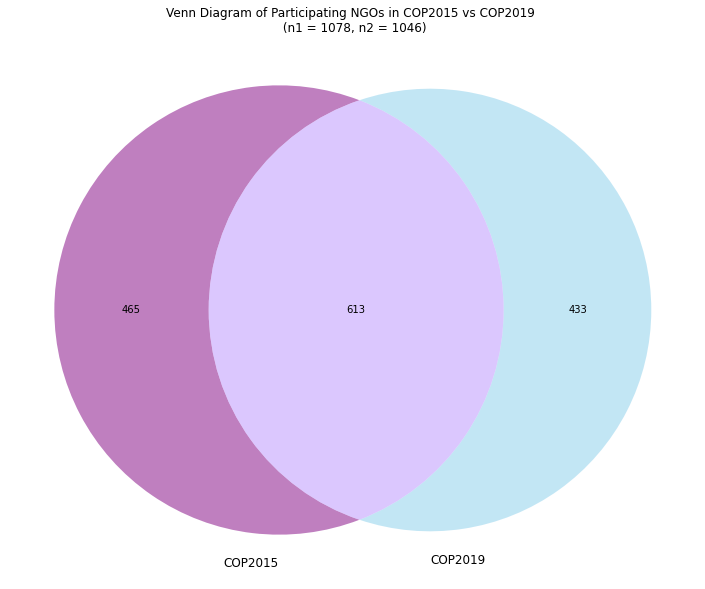

In [51]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt


L1 = set(list(NGO.name))
L2 = set(list(NGO_c2019.name))
Ab = L1 - L2
aB = L2 - L1
AB = L1 & L2

plt.figure(figsize=(20,10))
venn2(subsets = (len(Ab), len(aB), len(AB)), set_labels = ('COP2015', 'COP2019'), set_colors=('purple', 'skyblue'), alpha = 0.5)
plt.title("Venn Diagram of Participating NGOs in COP2015 vs COP2019 \n (n1 = 1078, n2 = 1046)")
plt.savefig("NGO_Venn_15_19", dpi = 400, facecolor = 'white', bbox_inches = 'tight')



### 1.1 NGO Country Statistics

In [52]:
NGO_country_stats = pd.DataFrame(NGO.country.value_counts())
NGO_country_stats.reset_index(level=0, inplace=True)
NGO_country_stats.columns = ["Country", "Count"]

In [54]:
NGO_country_stats

,Country,Count
0,United States of America,228
1,France,104
2,United Kingdom of Great Britain and Northern I...,92
3,Germany,74
4,Belgium,40
...,...,...
77,El Salvador,1
78,Congo,1
79,Benin,1
80,Angola,1


In [55]:
NGO_country_stats.to_csv("2015_NGO_country_stats.csv")

### 1.2 NGO City Statistics

In [56]:
NGO_city_stats = pd.DataFrame(NGO.city.value_counts())
NGO_city_stats.reset_index(level=0, inplace=True)
NGO_city_stats.columns = ["City", "Count"]

In [58]:
NGO_city_stats.head(20)

,City,Count
0,Paris,60
1,London,53
2,Washington,48
3,Brussels,37
4,New York,25
5,Berlin,22
6,Tokyo,17
7,Washington DC,15
8,Beijing,15
9,Geneva,15


In [59]:
NGO_city_stats.to_csv("2015_NGO_city_stats.csv", index = False)

### 1.3 Data Visualizations (barcharts) for Country and City Statistics (NGO)

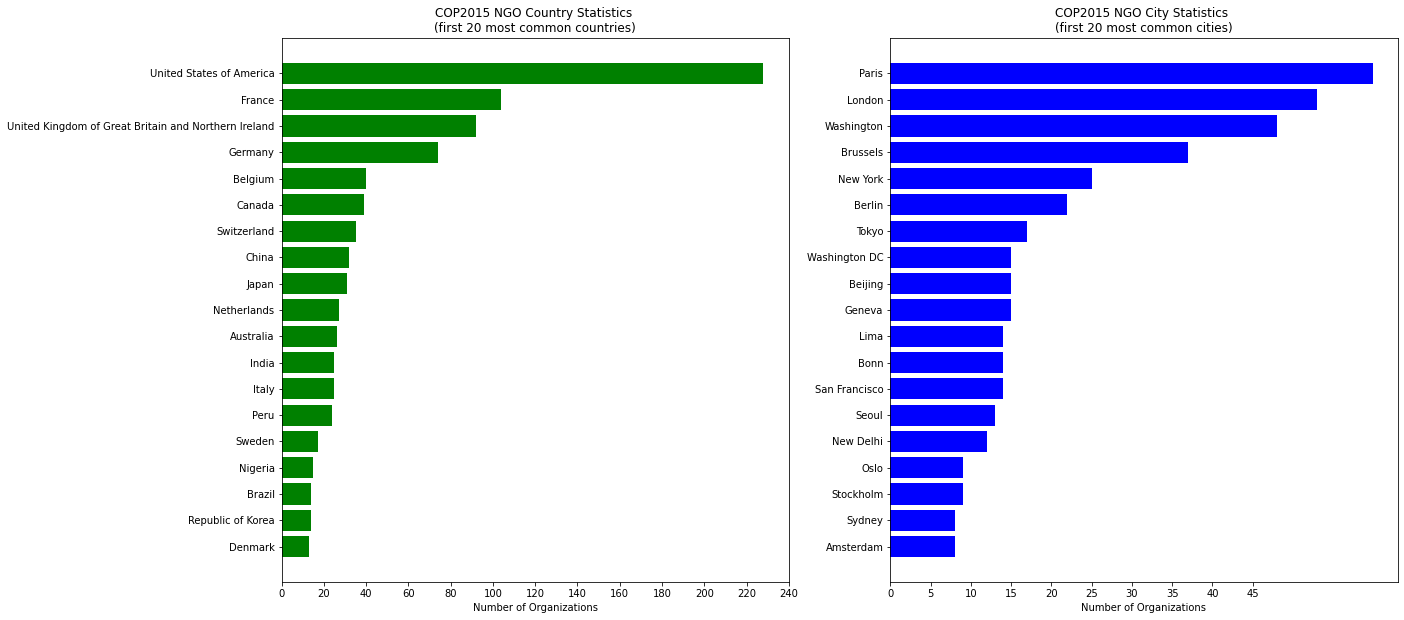

In [60]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.gca().invert_yaxis()
plt.barh(NGO_country_stats.Country[0:19], NGO_country_stats.Count[0:19], color = ["green"])
plt.title("COP2015 NGO Country Statistics \n(first 20 most common countries)")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 250, 20))

plt.subplot(1, 2, 2)
plt.gca().invert_yaxis()
plt.barh(NGO_city_stats.City[0:19], NGO_city_stats.Count[0:19], color = ["blue"])
plt.title("COP2015 NGO City Statistics \n(first 20 most common cities)")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0, 50, 5))
plt.savefig("COP2015_NGO_country_city_stats.png", facecolor = "white", dpi = 400)

### 1.4 NGO Constituency Statistics

In [61]:
NGO.constituency.unique()

array(['Constituency - Research and independent',
       'Constituency - Environmental', 'Constituency - Environmental CAN',
       'Constituency - ENGO', 'Constituency - Youth',
       'Constituency - Business and Industry', 'Constituency - Farmers',
       'Constituency - Women and Gender',
       'Constituency - Indigenous peoples',
       'Constituency - Business and Industry2', nan,
       'Constituency - Local government and Municipal authorities',
       'Constituency - Trade Unions', 'Constituency - Environmental CJN'],
      dtype=object)

In [62]:
NGO["constituency"] = NGO["constituency"].replace(np.nan, "not yet affiliated/no data")

In [63]:
NGO.constituency.unique()

array(['Constituency - Research and independent',
       'Constituency - Environmental', 'Constituency - Environmental CAN',
       'Constituency - ENGO', 'Constituency - Youth',
       'Constituency - Business and Industry', 'Constituency - Farmers',
       'Constituency - Women and Gender',
       'Constituency - Indigenous peoples',
       'Constituency - Business and Industry2',
       'not yet affiliated/no data',
       'Constituency - Local government and Municipal authorities',
       'Constituency - Trade Unions', 'Constituency - Environmental CJN'],
      dtype=object)

In [64]:
NGO_constituency_stats = pd.DataFrame(NGO.constituency.value_counts())
NGO_constituency_stats.reset_index(level=0, inplace=True)
NGO_constituency_stats.columns = ["Constituency", "Count"]

In [65]:
NGO_constituency_stats

,Constituency,Count
0,Constituency - Research and independent,310
1,Constituency - Environmental,271
2,Constituency - Environmental CAN,135
3,Constituency - Business and Industry,119
4,not yet affiliated/no data,53
5,Constituency - ENGO,47
6,Constituency - Youth,41
7,Constituency - Indigenous peoples,28
8,Constituency - Local government and Municipal ...,24
9,Constituency - Environmental CJN,18


### 1.4.1 Piechart

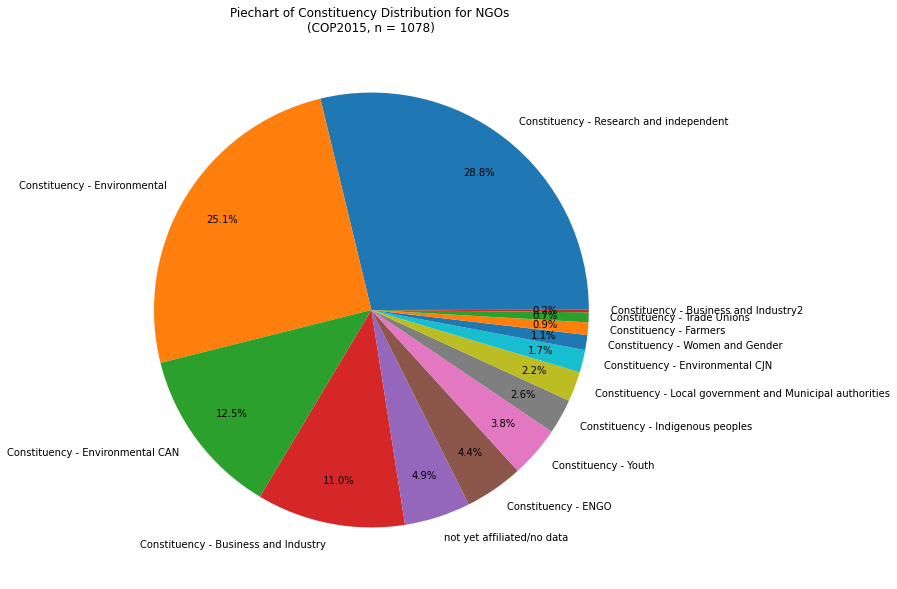

In [77]:
plt.figure(figsize=(20,10))
plt.pie(NGO_constituency_stats.Count,labels=NGO_constituency_stats.Constituency,
        autopct='%1.1f%%',
        startangle = 0.06,
        pctdistance = 0.8)
plt.title("Piechart of Constituency Distribution for NGOs \n(COP2015, n = 1078)")
plt.savefig("2015_NGO_constituency_piechart.png", facecolor = "white")

In [240]:
new_const = [constituency[(constituency.find('-') + 2):] for constituency in list(NGO_constituency_stats.Constituency)]

In [241]:
new_const

['Environmental',
 'Research and independent',
 'Business and Industry',
 'Environmental CAN',
 'Youth',
 'ENGO',
 'Indigenous peoples',
 'Women and Gender',
 'Local government and Municipal authorities',
 'ot yet affiliated',
 'Farmers',
 'Environmental CJN',
 'Business and Industry2',
 'Trade Unions']

In [242]:
new_const[-5] = 'not yet affiliated'

In [243]:
new_const

['Environmental',
 'Research and independent',
 'Business and Industry',
 'Environmental CAN',
 'Youth',
 'ENGO',
 'Indigenous peoples',
 'Women and Gender',
 'Local government and Municipal authorities',
 'not yet affiliated',
 'Farmers',
 'Environmental CJN',
 'Business and Industry2',
 'Trade Unions']

### 1.4.2 Barchart

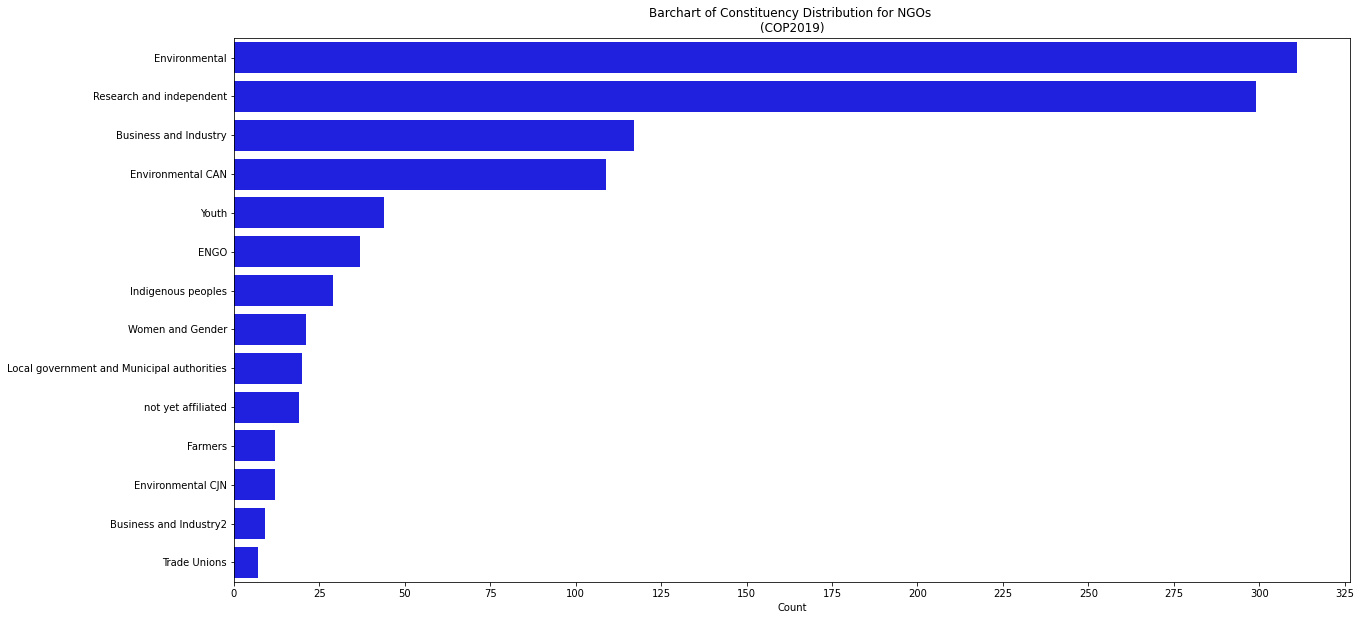

In [265]:
plt.figure(figsize = (20, 10))
sns.barplot(y = new_const,
           x = NGO_constituency_stats.Count,
           orient='h',
           color = "blue")
plt.xticks(np.arange(0, 350, 25))
plt.title("Barchart of Constituency Distribution for NGOs \n(COP2019)")
plt.savefig("NGO_constituency_barchart.png", facecolor = "white")

### 1.4.3 Map

In [78]:
def country_name_to_country_alpha3_(country):
    """
    Returns the ISO3 of the country.
    Args: country (str)
    Output: iso3 (str)
    """
    try:
        iso3 = pycountry.country_name_to_country_alpha3(country)
    except:
        iso3 = ""
    return iso3

NGO_country_stats["ISO3"] = [country_name_to_country_alpha3_(country) for country in list(NGO_country_stats.Country)]

In [79]:
NGO_country_stats[NGO_country_stats.ISO3==""]

,Country,Count,ISO3
17,Republic of Korea,14,
37,Bolivia (Plurinational State of),4,
52,Holy See,1,
62,Iran (Islamic Republic of),1,


It seems that 4 countries were not identified by the `country_name_to_alpha3` function. These are:
* Republic of Korea
* Bolivia
* Iran
* Holy See

We will manually compute the ISO3 for these countries as follows:

In [80]:
NGO_country_stats.loc[[17, 37, 52, 62], "ISO3"] = ["KOR", "BOL", "VAT", "IRN"]

In [81]:
NGO_country_stats.tail(10)

,Country,Count,ISO3
72,Russian Federation,1,RUS
73,Indonesia,1,IDN
74,Costa Rica,1,CRI
75,Dominican Republic,1,DOM
76,Algeria,1,DZA
77,El Salvador,1,SLV
78,Congo,1,COG
79,Benin,1,BEN
80,Angola,1,AGO
81,Uganda,1,UGA


In [105]:
NGO_country_stats.to_csv("2015_NGO_country_stats.csv")

In [82]:
NGO_city_stats.to_csv("2015_NGO_city_stats.csv")

In [103]:
fig = px.choropleth(NGO_country_stats, 
                    locations="ISO3",
                    color="Count", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale="reds",
                    title = "Color-Coded Map of the Country of Origin of NGOs participating at COP2015",
                    projection = "natural earth",
                    range_color = [0, 250])

fig.write_html("Color-Coded Map of the Country of Origin of NGOs participating at COP2015.html")
fig.show()

## 2. IGOs

In [84]:
IGO = pd.read_csv("IGOs_COP2015_complete.csv")
IGO

,name,entity_type,coordinator,city,country,remarks
0,Adaptation Fund Board,Intergovernmental organizations,Mr. Mikko Antti Ollikainen,Washington DC,United States of America,NaN
1,African Centre of Meteorological Application f...,Intergovernmental organizations,Ms. Safia Alfa,Niamey,Niger,NaN
2,African Development Bank Group,Intergovernmental organizations,Ms. Louise Helen Brown,Tunis,Tunisia,NaN
3,African Union Commission,Intergovernmental organizations,Mr. Harsen Nyambe Nyambe,Addis Ababa,Ethiopia,NaN
4,"African, Caribbean and Pacific Group of States",Intergovernmental organizations,Mr. Israel Olusola Ojo,Brussels,Belgium,NaN
...,...,...,...,...,...,...
62,Regional Environmental Center for Central and ...,Intergovernmental organizations,Mr. Eduardas Kazakevicius,Szentendre,Hungary,NaN
63,Secretaria General Iberoamericana,Intergovernmental organizations,Ms. Maria Salvadora Ortiz,Madrid,Spain,NaN
64,South Centre,Intergovernmental organizations,Mr. Luis Fernando Rosales,Geneva,Switzerland,NaN
65,Technical Centre for Agricultural and Rural Co...,Intergovernmental organizations,Mr. Oluyede Clifford Ajayi,Wageningen,Netherlands,NaN


In [ ]:
# count = 67, which matches with the official count of 67

In [86]:
IGO_c2019 = pd.read_csv("IGOs_COP2019_complete.csv")
IGO_c2019

,name,entity_type,TotalMembers,MaleMembers,FemaleMembers,coordinator,city,country
0,Adaptation Fund Board,Intergovernmental organizations,11,4,7,Mr. Mikko Antti Ollikainen,Washington DC,United States of America
1,African Centre of Meteorological Application f...,Intergovernmental organizations,14,10,4,Ms. Safia Alfa,Niamey,Niger
2,African Development Bank Group,Intergovernmental organizations,16,8,8,Ms. Louise Helen Brown,Tunis,Tunisia
3,African Union Commission,Intergovernmental organizations,32,18,14,Mr. Harsen Nyambe Nyambe,Addis Ababa,Ethiopia
4,"African, Caribbean and Pacific Group of States",Intergovernmental organizations,4,2,2,Mr. Israel Olusola Ojo,Brussels,Belgium
...,...,...,...,...,...,...,...,...
67,Regional Community Forestry Training Center fo...,Intergovernmental organizations,4,2,2,Ms. Jennifer Jadin,Bangkok,Thailand
68,Secretaria General Iberoamericana,Intergovernmental organizations,7,3,4,Ms. Maria Salvadora Ortiz,Madrid,Spain
69,Secrétariat général de l’union du Maghreb Arabe,Intergovernmental organizations,1,0,1,Mme Faouzia Chakiri,Rabat,Morocco
70,Secretariat of the Pacific Community,Intergovernmental organizations,7,5,2,Ms. Sylvie Michelle Goyet,Noumea,France


In [ ]:
# count = 72, which is less than the official count of 76

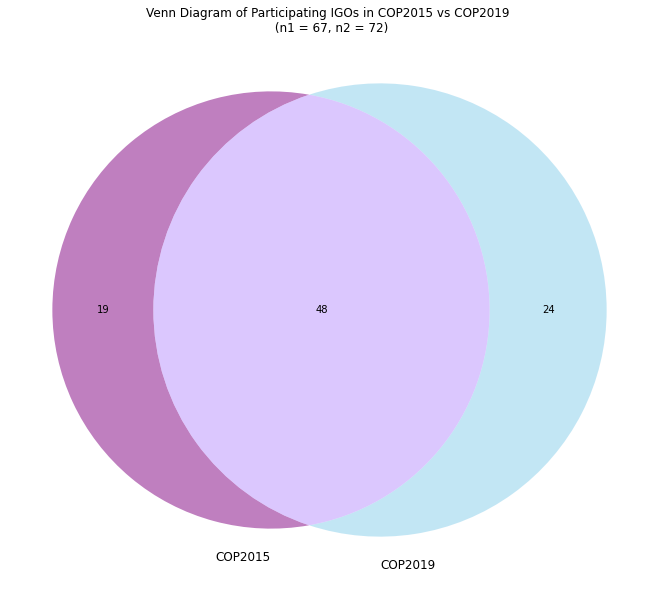

In [87]:
L1 = set(list(IGO.name))
L2 = set(list(IGO_c2019.name))
Ab = L1 - L2
aB = L2 - L1
AB = L1 & L2

plt.figure(figsize=(20,10))
venn2(subsets = (len(Ab), len(aB), len(AB)), set_labels = ('COP2015', 'COP2019'), set_colors=('purple', 'skyblue'), alpha = 0.5)
plt.title("Venn Diagram of Participating IGOs in COP2015 vs COP2019 \n (n1 = 67, n2 = 72)")
plt.savefig("IGO_Venn_15_19", dpi = 400, facecolor = 'white', bbox_inches = 'tight')

### 2.1 Country Statistics

In [88]:
IGO_country_stats = pd.DataFrame(IGO.country.value_counts())
IGO_country_stats.reset_index(level=0, inplace=True)
IGO_country_stats.columns = ["Country", "Count"]

In [89]:
IGO_country_stats.head()

,Country,Count
0,Switzerland,6
1,France,6
2,Finland,4
3,United Kingdom of Great Britain and Northern I...,4
4,Austria,3


In [90]:
IGO_country_stats.to_csv("2015_IGO_country_stats.csv")

### 2.2 City Statistics

In [91]:
IGO_city_stats = pd.DataFrame(IGO.city.value_counts())
IGO_city_stats.reset_index(level=0, inplace=True)
IGO_city_stats.columns = ["City", "Count"]

In [92]:
IGO_city_stats.head()

,City,Count
0,Paris,4
1,Geneva,4
2,London,3
3,Helsinki,2
4,Vienna,2


In [93]:
IGO_city_stats.to_csv("2015_IGO_city_stats.csv", index = False)

### 2.3 Data Visualizations (barcharts) for Country and City Statistics (IGO)

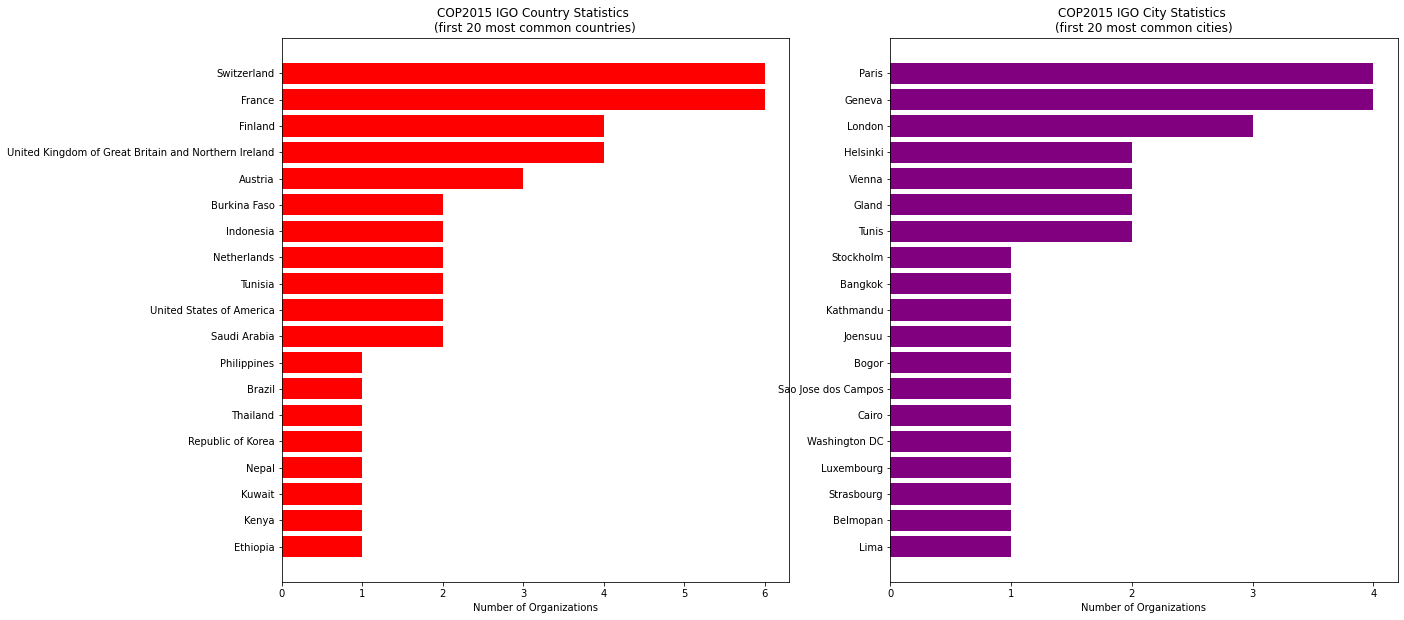

In [97]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.gca().invert_yaxis()
plt.barh(IGO_country_stats.Country[0:19], IGO_country_stats.Count[0:19], color = ["red"])
plt.title("COP2015 IGO Country Statistics \n(first 20 most common countries)")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0,7,1))

plt.subplot(1, 2, 2)
plt.gca().invert_yaxis()
plt.barh(IGO_city_stats.City[0:19], IGO_city_stats.Count[0:19], color = ["purple"])
plt.title("COP2015 IGO City Statistics \n(first 20 most common cities)")
plt.xlabel("Number of Organizations")
plt.xticks(np.arange(0,5,1))
plt.savefig("COP2015_IGO_country_city_stats.png", facecolor = "white")

### Country Map

In [98]:
IGO_country_stats["ISO3"] = [country_name_to_country_alpha3_(country) for country in list(IGO_country_stats.Country)]

In [99]:
IGO_country_stats[IGO_country_stats.ISO3==""]

,Country,Count,ISO3
14,Republic of Korea,1,
37,Venezuela (Bolivarian Republic of),1,


It seems that 3 countries were not identified by the `country_name_to_alpha3` function. These are:
* Republic of Korea
* Bolivia
* Venezuela

We will manually compute the ISO3 for these countries as follows:

In [100]:
IGO_country_stats.loc[[14, 37], "ISO3"] = ["KOR", "VEN"]

In [101]:
IGO_country_stats.tail()

,Country,Count,ISO3
38,Fiji,1,FJI
39,Nigeria,1,NGA
40,Mauritius,1,MUS
41,Hungary,1,HUN
42,Niger,1,NER


In [107]:
IGO_country_stats.to_csv("2015_IGO_country_stats.csv")

In [102]:
IGO_city_stats.to_csv("2015_IGO_city_stats.csv")

In [104]:
fig = px.choropleth(IGO_country_stats, 
                    locations="ISO3",
                    color="Count", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale="greens",
                    title = "Color-Coded Map of the Country of Origin of IGOs participating at COP2015",
                    projection = "natural earth")

fig.write_html("Color-Coded Map of the Country of Origin of IGOs participating at COP2015.html")
fig.show()